In [51]:
#
# yasin fırat payalan 16501010
# Remote Sensing and Image Interpretation Course Homework Exercise
# 2D-Convolution Benchmark
# myconv(x,h) is custom convolution function has been implemented through convolution algorithm.
# myconv(x,h) results are compared with numpy.convolve(x,h) function.

from collections import  deque
# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
# plotly.tools.set_credentials_file(username='yasinfp', api_key='dkv3WssqLwH7UFJrDzY3')


def shift(l):
    items = deque(l)
    items.rotate(1)
    rotatedList=list(items)
    rotatedList[0]='X'
    return list(rotatedList)

#frame shifting is used to calculate each response of units.
"""
x=[1,4,2,5]
h=[3,4,1]
1.h response is reversed to ->[1,4,3] as hReverse
2.initialize frames to prepare calculating convolution.
xList and hList are our frames. We need to determine size of frame.
len(x)+len(h)+1 is the formula of frame size.
all items of hReverse are appended to hList. 
After this process, we can filled with 'X' into hList frame. As a result;
hList=[1,4,3,'X','X','X','X','X']
Nearly same process is executed to xList and result is
xList=['X','X',1,4,2,5,'X','X']
3.iterate through xList and hList
we can compute current convolution by values. 
values should not equal to 'X' variable on both hList and xList.
For ex;
At first iteration third members of lists have integer value. 
We can compute the first convolution with currentRes=currentRes+hList[i]*xList[i]
end of iteration hList will be shifted and result is appended to convResult vector.

"""
def myconv(x,h):
    hList= []
    xList= []
    #frame size
    totalIndex=len(x)+len(h)+1
    hReverse=h[::-1]
    #fill hList with hReverse
    hList=[i for i in hReverse]
    for i in range(0,totalIndex-len(h)):
        hList.append("X")
    #fill xList with X
    xList=['X' for i in range(0,len(h)-1)]
    for i in range(0,len(x)):
        xList.append(x[i])
    for i in range(0,len(h)-1):
        xList.append("X")
    #lets calculate
    convResult=[]
    for j in range(0,len(x)+len(h)-1):
        currentRes=0
        for i in range(0,totalIndex):
            if hList[i] != "X" and xList[i] != "X":
                currentRes=currentRes+hList[i]*xList[i];
        convResult.append(currentRes)
        hList=shift(hList)
    return convResult;

def myPlot(x,xlabel):
    markerline, stemlines, baseline = plt.stem([i for i in range(0,len(x))], x, '-.')
    plt.setp(baseline, 'color', 'r', 'linewidth', 2)
    plt.xlabel(xlabel)
    plt.ylabel('signal')
    plt.show()


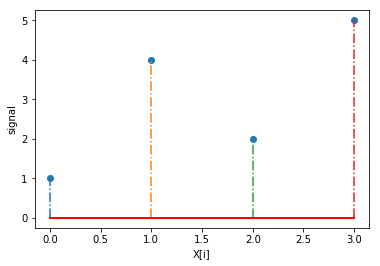

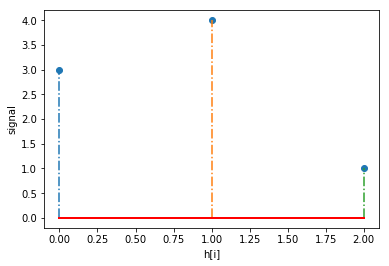

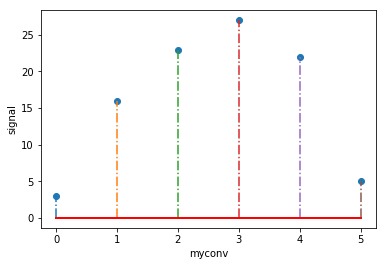

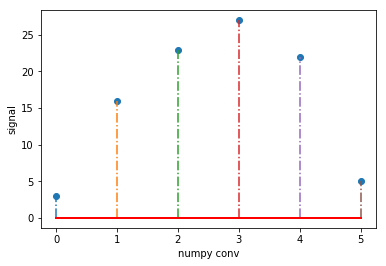

In [52]:
x=[1,4,2,5]
h=[3,4,1]
#my convolution
myResult=myconv(x,h)
#numpy's convolution
result=np.convolve(x,h)

myPlot(x,'X[i]')
myPlot(h,'h[i]')
myPlot(myResult,'myconv')
myPlot(result,'numpy conv')


